<a href="https://www.kaggle.com/code/niramay/coffee-maker-sentiment-predictor?scriptVersionId=110809407" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Importing necessary libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.naive_bayes import ComplementNB


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/-coffeemakerclassification/coffee_maker.csv


# **Loading the dataset**

In [2]:
all_data = pd.read_csv('/kaggle/input/-coffeemakerclassification/coffee_maker.csv')
all_data.head()

,review_date,handle,rating,helpfulness_rating,review
0,"April 14, 2018",The Dolphin,2.0,513,Delightful coffee maker if you’re only looking...
1,"February 7, 2019",Karen Kaffenberger,1.0,122,UPDATE: Bought this 10-21-18 and I finally ret...
2,"December 23, 2017",C1C3C11,4.0,185,The big reason I ordered this was because I wa...
3,"November 26, 2016",Paul Roberts,5.0,224,I've owned several of their older brewstation ...
4,"November 28, 2017",JennyD,3.0,116,I agonized over which coffee maker to purchase...


# **Preprocessing**

In [3]:
# creating a label column based on the product ratings. 
# Negative sentiment is the outcome of interest. 
# Ratings 1-3 -> negative sentiment. Ratings 4-5 -> positive sentiment

all_data['label'] = all_data.apply(lambda row: row.rating>3.0,axis=1)
all_data['label'] = all_data['label'].astype(int)
all_data

,review_date,handle,rating,helpfulness_rating,review,label
0,"April 14, 2018",The Dolphin,2.0,513,Delightful coffee maker if you’re only looking...,0
1,"February 7, 2019",Karen Kaffenberger,1.0,122,UPDATE: Bought this 10-21-18 and I finally ret...,0
2,"December 23, 2017",C1C3C11,4.0,185,The big reason I ordered this was because I wa...,1
3,"November 26, 2016",Paul Roberts,5.0,224,I've owned several of their older brewstation ...,1
4,"November 28, 2017",JennyD,3.0,116,I agonized over which coffee maker to purchase...,0
...,...,...,...,...,...,...
4995,"February 4, 2014",shashi,5.0,NaN,Our Mr. Coffee machine stopped working one day...,1
4996,"May 2, 2019",Connie Krusi,1.0,NaN,This is the second generation of this product ...,0
4997,"August 28, 2014",KL,5.0,NaN,Wow works great and bought it for a bargain wi...,1
4998,"December 16, 2019",Nancy,2.0,NaN,Doesn’t brew correctly need to start to get al...,0


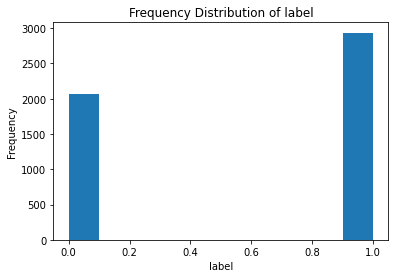

In [4]:
# Assessing label class distribution

plt.hist(all_data['label'])
plt.gca().set(title = 'Frequency Distribution of label',ylabel='Frequency',xlabel='label')
plt.show()

As seen from the above histogram, we do not have any class imbalance problem here and this is good distribution of the target variable.

Converting all the reviews in the dataset to lower string

In [5]:
all_data['review'] = all_data['review'].astype(str).apply(lambda x:x.lower())
all_data.head()

,review_date,handle,rating,helpfulness_rating,review,label
0,"April 14, 2018",The Dolphin,2.0,513,delightful coffee maker if you’re only looking...,0
1,"February 7, 2019",Karen Kaffenberger,1.0,122,update: bought this 10-21-18 and i finally ret...,0
2,"December 23, 2017",C1C3C11,4.0,185,the big reason i ordered this was because i wa...,1
3,"November 26, 2016",Paul Roberts,5.0,224,i've owned several of their older brewstation ...,1
4,"November 28, 2017",JennyD,3.0,116,i agonized over which coffee maker to purchase...,0


# **Splitting the Dataset into Train & Test**

random_state is set to 14 and train/test will be a 70/30 split.

In [6]:
X = all_data['review']
y = all_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500,), (1500,), (3500,), (1500,))

# **Fitting the Multinomail Naive Bayes Model**

In [7]:
stopwords = stopwords.words('english')

multinomialNB = Pipeline([
                    ('vect', CountVectorizer(stop_words=stopwords)),
                    ('tfidf', TfidfTransformer()),
                    ('nb', MultinomialNB()),
                    ])

multinomialNB.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('tfidf', TfidfTransformer()), ('nb', MultinomialNB())])

# **Evaluating the Multinomial Naive Bayes Model**

**Evaluation Metrics: average precision, recall, F1, ROC AUC, and Precision/Recall AUC**

In [8]:
predictions = multinomialNB.predict(X_test)
prediction_probabilities = multinomialNB.predict_proba(X_test)[:, 1]

print(classification_report(y_test, predictions))

fpr, tpr, _ = roc_curve(y_test, prediction_probabilities)
precision, recall, _ = precision_recall_curve(y_test, predictions)

print('ROC AUC: ', auc(fpr, tpr))
print('Precision/Recall AUC: ', auc(precision, recall))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81       622
           1       0.83      0.95      0.89       878

    accuracy                           0.86      1500
   macro avg       0.87      0.84      0.85      1500
weighted avg       0.87      0.86      0.85      1500

ROC AUC:  0.9410903544301944
Precision/Recall AUC:  0.3196621040986506


# **Fitting the Complement Naive Bayes Model**

In [9]:
complementNB = Pipeline([
                    ('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('nb', ComplementNB()),
                    ])

complementNB.fit(X_train, y_train)


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('nb', ComplementNB())])

# **Evaluating the Complement Naive Bayes Model**

**Evaluation Metrics: average precision, recall, F1, ROC AUC, and Precision/Recall AUC**

In [10]:
predictions_ = complementNB.predict(X_test)
prediction_probabilities_ = complementNB.predict_proba(X_test)[:, 1]

print(classification_report(y_test, predictions_))

fpr_, tpr_, _ = roc_curve(y_test, prediction_probabilities_)
precision_, recall_, _ = precision_recall_curve(y_test, predictions_)

print('AUC: ', auc(fpr_, tpr_))
print('Precision/Recall AUC: ', auc(precision_, recall_))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       622
           1       0.88      0.91      0.90       878

    accuracy                           0.88      1500
   macro avg       0.87      0.87      0.87      1500
weighted avg       0.88      0.88      0.87      1500

AUC:  0.942683422569564
Precision/Recall AUC:  0.3359312087862737
